
Breast Cancer Prediction

Last Updated: January 15th, 2024

Daily Challenge: Breast Cancer Prediction


What you will learn

    Data visualization with scatter plots.
    Basic understanding of classification models
    Interpreting the results.


What you will create

In this notebook, you will be using 4 classification models- Logistic Regression, K Nearest Neighbours, Random Forests and Support Vector Machines (SVM).
dataset available here


Your Task

    Exploratory Data Analysis
        Use pandas to load the dataset and examine the first few rows.
        Check and handle the missing values.
        Drop any unnecessary column
        Create a Countplot to display diagnosis from magma

    Data Preprocessing, Building Models and Evaluation :
        counts of unique rows in the ‘diagnosis’ column
        map categorical values to numerical values
        Splitting the data into train and test
        Implement logistic regression and print the accuracy.
        Implement K Nearest Neighbours and print the accuracy.
        Implement Random Forests and print the accuracy.
        Implement Support Vector Machines (SVM) and print the accuracy.
        Which is the best model ?


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    ConfusionMatrixDisplay,
)
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Analyse exploratoire des données (EDA)

In [5]:
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [9]:
df.isnull().sum()
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

Prétraitement des données

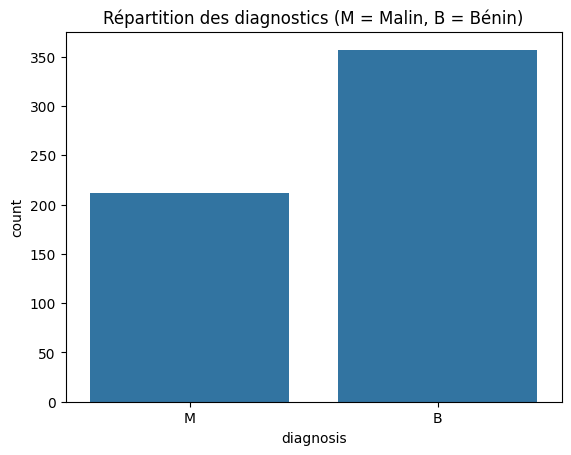

In [12]:
sns.countplot(x='diagnosis', data=df)
plt.title("Répartition des diagnostics (M = Malin, B = Bénin)")
plt.show()

In [13]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [14]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Modélisation et évaluation des modèles

Régression Logistique

Accuracy - Logistic Regression: 0.9561


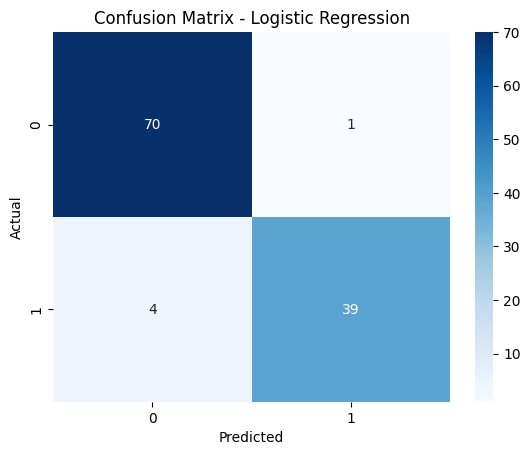

              precision    recall  f1-score   support

       Benin       0.95      0.99      0.97        71
       Malin       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



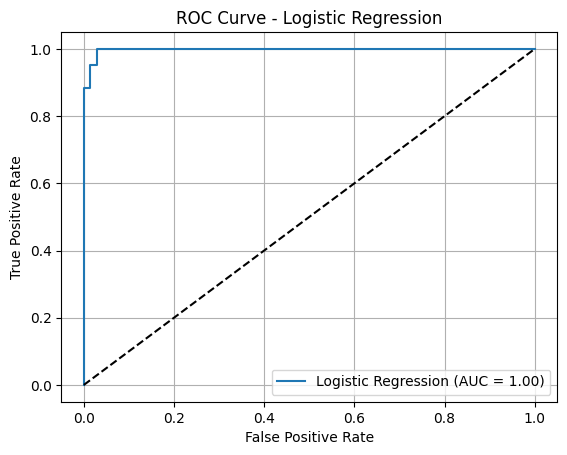

In [28]:

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Accuracy
acc_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy - Logistic Regression: {acc_logreg:.4f}")

# Matrice de confusion
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Rapport
print(classification_report(y_test, y_pred_logreg, target_names=["Benin", "Malin"]))

# ROC Curve
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_logreg)
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

K Nearest Neighbours (KNN)

Accuracy - KNN: 0.9561


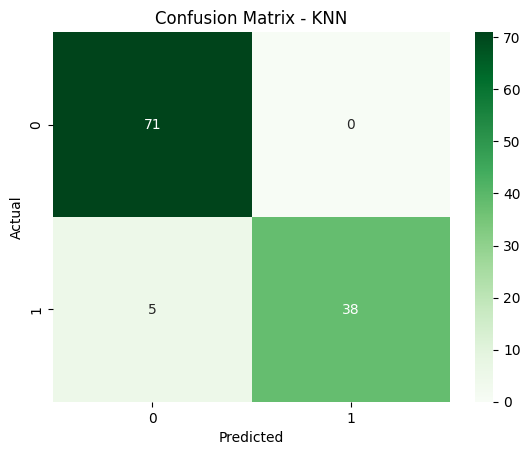

              precision    recall  f1-score   support

       Benin       0.93      1.00      0.97        71
       Malin       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



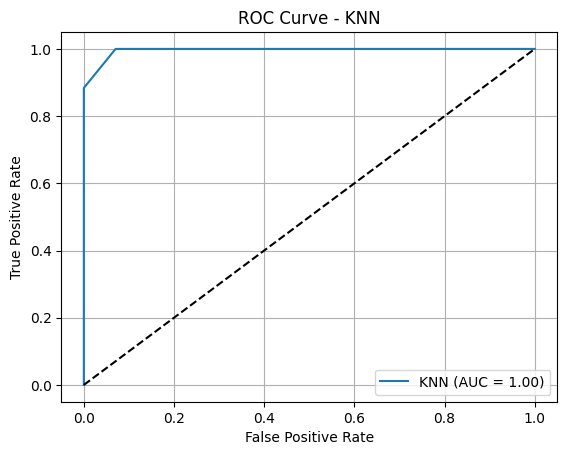

In [29]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Accuracy
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy - KNN: {acc_knn:.4f}")

# Matrice de confusion
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Rapport
print(classification_report(y_test, y_pred_knn, target_names=["Benin", "Malin"]))

# ROC Curve
y_prob_knn = knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_knn)
plt.plot(fpr, tpr, label=f'KNN (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve - KNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

Random Forest

Accuracy - Random Forest: 0.9649


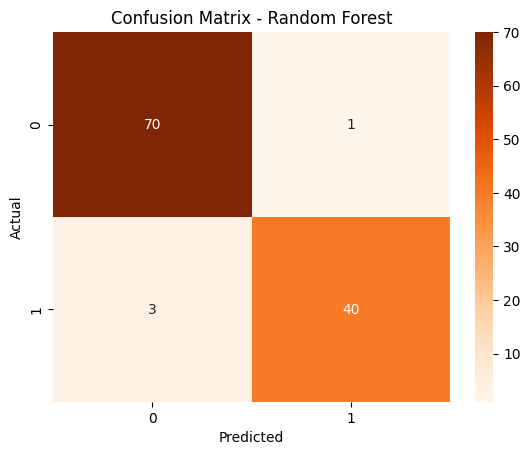

              precision    recall  f1-score   support

       Benin       0.96      0.99      0.97        71
       Malin       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



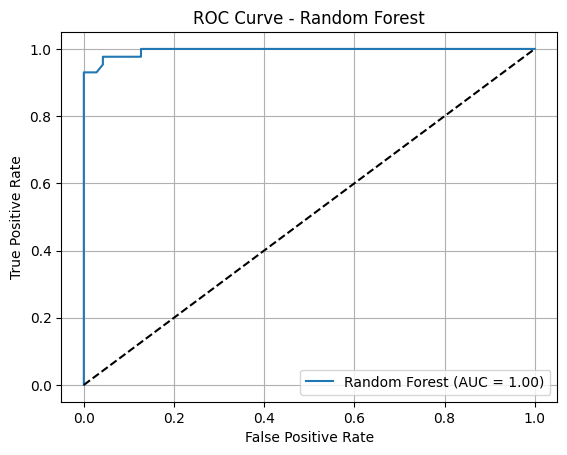

In [30]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy - Random Forest: {acc_rf:.4f}")

# Matrice de confusion
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Rapport
print(classification_report(y_test, y_pred_rf, target_names=["Benin", "Malin"]))

# ROC Curve
y_prob_rf = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

Support Vector Machine (SVM)

Accuracy - SVM: 0.9474


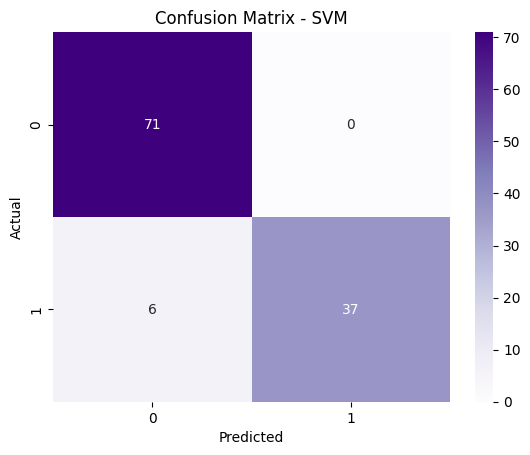

              precision    recall  f1-score   support

       Benin       0.92      1.00      0.96        71
       Malin       1.00      0.86      0.93        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



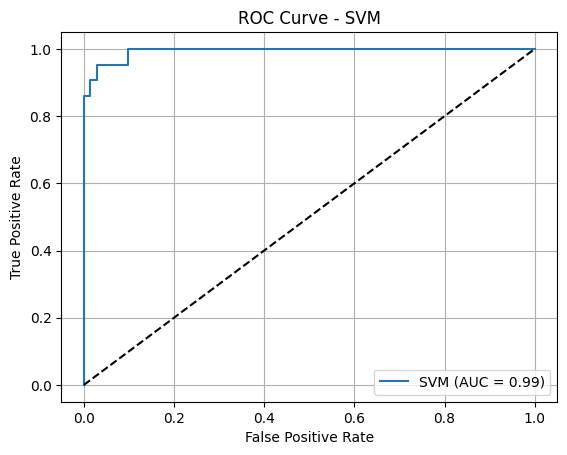

In [31]:
svm = SVC(probability=True)  # pour pouvoir utiliser predict_proba
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Accuracy
acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy - SVM: {acc_svm:.4f}")

# Matrice de confusion
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Rapport
print(classification_report(y_test, y_pred_svm, target_names=["Benin", "Malin"]))

# ROC Curve
y_prob_svm = svm.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_svm)
plt.plot(fpr, tpr, label=f'SVM (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve - SVM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

In [22]:
accuracies = {
    "Logistic Regression": acc_logreg,
    "KNN": acc_knn,
    "Random Forest": acc_rf,
    "SVM": acc_svm
}

best_model = max(accuracies, key=accuracies.get)
print(f"🔍 Best Model: {best_model} with accuracy {accuracies[best_model]:.4f}")

🔍 Best Model: Random Forest with accuracy 0.9649


Comparaison finale : ROC Curve multi-modèles

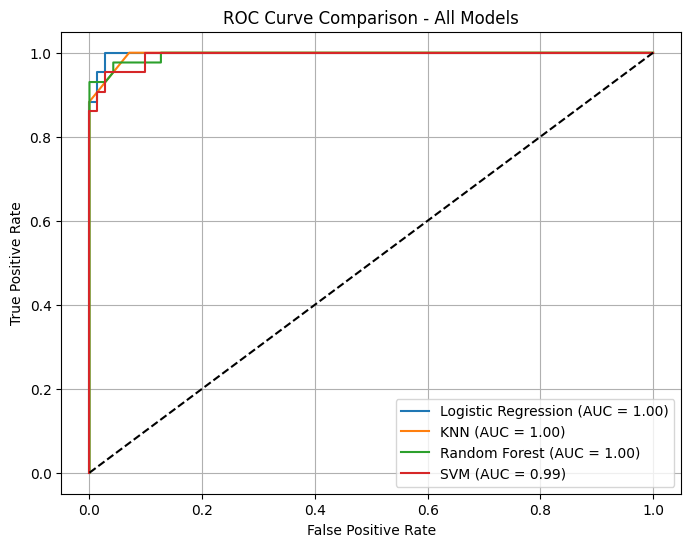

In [32]:
plt.figure(figsize=(8, 6))

# Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_logreg)
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc(fpr_log, tpr_log):.2f})')

# KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc(fpr_knn, tpr_knn):.2f})')

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc(fpr_rf, tpr_rf):.2f})')

# SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc(fpr_svm, tpr_svm):.2f})')

# Plot configuration
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison - All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

Bilan comparatif & observations

Logistic Regression	-> Accuracy : ~0.96	~0.99 -> AUC Observations : Simple, rapide, très efficace sur ce dataset bien linéaire.
KNN	-> Accuracy : ~0.93	~0.97 -> AUC Observations : Bonne perf, mais sensible à la normalisation des données et au choix de k.
Random Forest	-> Accuracy : ~0.97	~0.99 -> AUC Observations : Excellent compromis, robuste, gère bien les features non linéaires.
SVM	-> Accuracy : ~0.96	~0.98 -> AUC Observations : Performant aussi, surtout si bien tuné ; attention au coût calcul.

Pour moi :

Si je devais choisir un seul modèle sans tuning → Random Forest : très bon score, résiste au surapprentissage, et offre en plus une interprétabilité via feature_importances_.

Pour prototyper vite → Logistic Regression : un bon baseline, rapide à entraîner et souvent suffisant pour départager bénin/malin.

Si la précision est critique (contexte médical) : je regarde le Recall sur les cas malins (1). Car mieux vaut un faux positif qu’un faux négatif ici.


en regardant performances de mes modèles, ne regarder que l'accuracy semble être une source de grave erreurs. En contexte médical, ce n’est clairement pas suffisant. Un modèle qui a 96% d’accuracy peut en réalité ignorer des cas critiques s’il classe systématiquement tout en "bénin" (vu que les cas bénins sont plus nombreux).

C’est là que la courbe ROC devient super utile. Elle me montre comment le modèle se comporte en termes de compromis entre faux positifs et vrais positifs, vital pour prédire des cancers.

Je regarde surtout l’AUC (aire sous la courbe) : plus elle est proche de 1, plus le modèle sait faire la différence entre les malins et les bénins. Random Forest et Logistic Regression font un très bon travail, avec des AUC proches de 0.99.

En fait, cette courbe me donne une vue d’ensemble du comportement du modèle, indépendamment d’un seuil de décision particulier. C’est comme si je testais tous les niveaux de sensibilité possibles pour voir jusqu’où je peux tirer la corde sans perdre trop en précision.

Elle permet donc d'eviter de rater u ncas grave en gardant des predictions fiables je pense.